# CellCycleNet Example #2 - Fine tune pre-trained model with additional training

Steps:

1. given fields of view with already-segmented nuclei and their already-known labels, generate labeled single-nucleus images
2. from the generated single-nucleus images, compute the appropriate normalization factor and scale factor.
3. load the pre-trained model and perform additional training.
4. evaluate model performance.

### Step 1: create labeled single-nuclei images from segmented fields of view

In [1]:
from cellcyclenet import CellCycleNet, utils

IMAGE_DIR = '../data/example_data/test_tiles/'
MASK_DIR = '../data/example_data/test_masks/'
LABEL_DIR = '../data/example_data/test_labels/'
OUTPUT_DIR = '../data/example_data/test_SNI_label/'

# # generate unlabeled SNIs #
df = utils.generate_images_labeled(IMAGE_DIR, MASK_DIR, LABEL_DIR, OUTPUT_DIR, shape=(90,150,150), num_cores=None)
df

,tile_num,obj_num,filename,label
0,1,10,../data/example_data/test_SNI_label/tile_1_obj...,S/G2
1,1,12,../data/example_data/test_SNI_label/tile_1_obj...,S/G2
2,1,13,../data/example_data/test_SNI_label/tile_1_obj...,S/G2
3,1,1,../data/example_data/test_SNI_label/tile_1_obj...,G1
4,1,4,../data/example_data/test_SNI_label/tile_1_obj...,S/G2
5,1,5,../data/example_data/test_SNI_label/tile_1_obj...,G1
6,1,8,../data/example_data/test_SNI_label/tile_1_obj...,G1
7,2,10,../data/example_data/test_SNI_label/tile_2_obj...,S/G2
8,2,11,../data/example_data/test_SNI_label/tile_2_obj...,S/G2
9,2,2,../data/example_data/test_SNI_label/tile_2_obj...,G1


### Step 2: compute normalization and scale factors from generated single-nucleus images

In [2]:
# calculate norm and scale factors
norm_factor = utils.calc_norm_factor(df)
# scale_factor = utils.calc_scale_factor()
scale_factor = (2, 2, 2) # TODO

print(f'Computed normalization factor: {norm_factor}')
print(f'Computed scale factor: {scale_factor}')

Computed normalization factor: 1818.0
Computed scale factor: (2, 2, 2)


### Step 3: load pre-trained model and predict cell cycle stage

In [3]:
# load pre-trained model
model = CellCycleNet()

# create dataset
train, val, test = model.create_dataset(dataframe=df,
                                        norm_factor=norm_factor,
                                        scale_factors=scale_factor,
                                        split_data=True)

# train model
model.train(train, val, n_epochs=10, transform=None, lazy_load=True, verbose=True)
model.save_model('fine_tuned_model.pt')

Created training (n = 24), validation (n = 7), and testing splits (n = 4)...
Loading training (n = 24) images...
Loading validation (n = 7) images...


/home/conor/miniconda3/envs/ccn_dev_env/lib/python3.12/site-packages/torch/autograd/graph.py:744: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at /home/conda/feedstock_root/build_artifacts/libtorch_1718580525958/work/aten/src/ATen/cuda/CublasHandlePool.cpp:135.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Train Acc.: (E1) = 0.802
Train Loss: (E1) = 0.476 


Val Acc.: (E1) = 1.000
Val Loss: (E1) = 0.186 


Train Acc.: (E2) = 0.879
Train Loss: (E2) = 0.238 


Val Acc.: (E2) = 1.000
Val Loss: (E2) = 0.186 


Train Acc.: (E3) = 0.940
Train Loss: (E3) = 0.180 


Val Acc.: (E3) = 0.929
Val Loss: (E3) = 0.265 


Train Acc.: (E4) = 1.000
Train Loss: (E4) = 0.138 


Val Acc.: (E4) = 0.929
Val Loss: (E4) = 0.234 


Train Acc.: (E5) = 1.000
Train Loss: (E5) = 0.099 


Val Acc.: (E5) = 0.929
Val Loss: (E5) = 0.258 


Train Acc.: (E6) = 1.000
Train Loss: (E6) = 0.087 


Val Acc.: (E6) = 0.929
Val Loss: (E6) = 0.298 


Train Acc.: (E7) = 1.000
Train Loss: (E7) = 0.084 


Val Acc.: (E7) = 0.929
Val Loss: (E7) = 0.212 


Train Acc.: (E8) = 1.000
Train Loss: (E8) = 0.067 


Val Acc.: (E8) = 0.929
Val Loss: (E8) = 0.294 


Train Acc.: (E9) = 1.000
Train Loss: (E9) = 0.060 


Val Acc.: (E9) = 0.929
Val Loss: (E9) = 0.308 


Train Acc.: (E10) = 1.000
Train Loss: (E10) = 0.058 


Val Acc.: (E10) = 0.929
Val

### Step 4: evaluate model

Accuracy = 0.750
Confusion Matrix: 
TN: 2	  FP: 1
FN: 0	  TP: 1


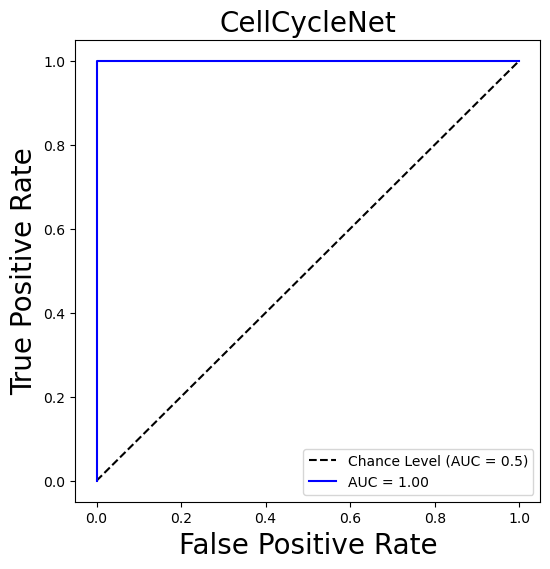

In [4]:
# evaluate model
test_preds = model.predict(test, with_labels=True)
model.plot_ROC(test_preds['label'], test_preds['pred'], test_preds['prob'])